# Computer lab 2: Working with pandas

Using  a  dataset  on  bike  rentals,  your  task  in  this  lab  is  to  analyze  the  data  graphically  as  well  as statistically. The dataset comes from an operator of rental bikes in Washington DC and covers two years of daily data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
PROJECT_ROOT_DIR = "../"
DATA_DIR = "data"

In [3]:
path = os.path.join(PROJECT_ROOT_DIR, DATA_DIR, "Bike-Sharing-Dataset")
bike = pd.read_csv(os.path.join(path, "day.csv"))

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Exercise 1

Get familiar with the data and answer the following questions using graphs:
* Plot in separatebar charts:
 1. How the ridership differs per seasono
 2. How the temperature differs per season

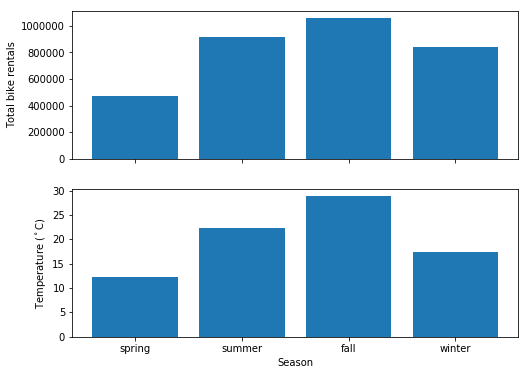

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,6))

# Plot 1
ax1.bar(bike.season.unique(), bike.groupby(by='season').sum().cnt)
ax1.set_ylabel('Total bike rentals')
ax1.locator_params(integer=True) #For plotting Seasons as integers

# Plot 2
temp_convers = 41  #From README: Normalized temperature in Celsius. The values are divided to 41 (max)
ax2.bar(bike.season.unique(), bike.groupby(by='season').mean().temp * temp_convers)
ax2.set_ylabel('Temperature ($^\circ$C)')


# Corrects x-axis to use names of seasons
season_label = {1:"spring", 2:"summer", 3:"fall", 4:"winter"} #Translation of seasons

labels = [item.get_text() for item in ax2.get_xticklabels()]
for i in range(1, len(season_label)+1):
    labels[i] = season_label[i]

#fig.align_labels() #Aligns Y labels of subplots, uncomment if looks better
ax2.set_xlabel('Season')
ax2.set_xticklabels(labels);

Well, it seems the y axes are pretty correlated.

# Exercise 2

How does weather, humidity, wind speed and temperature impact ridership? Run a regression for each of the three outcome variables. Is there a difference between registered and casual riders?

In [7]:
# For linear regression
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [8]:
bike[["weathersit", "hum", "windspeed", "temp"]].head()

,weathersit,hum,windspeed,temp
0,2,0.805833,0.160446,0.344167
1,2,0.696087,0.248539,0.363478
2,1,0.437273,0.248309,0.196364
3,1,0.590435,0.160296,0.200000
4,1,0.436957,0.186900,0.226957


In [9]:
model = ols("cnt ~ C(weathersit) + hum + windspeed + temp", bike)  #Weathersit is categorical
estimates = model.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.0
Date:                Fri, 13 Sep 2019   Prob (F-statistic):          1.62e-100
Time:                        18:38:32   Log-Likelihood:                -6330.5
No. Observations:                 731   AIC:                         1.267e+04
Df Residuals:                     725   BIC:                         1.270e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3434.9195    363

Temperature is positive correlated, while humidity and windspeed are negative correlated.
According to the weathersit definitions:
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

2 and 3 seem to be a bummer for bikesharing!

This conclusions hold for the individual groups below:

In [10]:
model = ols("casual ~ C(weathersit) + hum + windspeed + temp", bike)
estimates = model.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     75.31
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           1.48e-63
Time:                        18:38:48   Log-Likelihood:                -5658.6
No. Observations:                 731   AIC:                         1.133e+04
Df Residuals:                     725   BIC:                         1.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            389.7666    144

In [11]:
model = ols("registered ~ C(weathersit) + hum + windspeed + temp", bike)
estimates = model.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     83.58
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           2.56e-69
Time:                        18:38:50   Log-Likelihood:                -6245.1
No. Observations:                 731   AIC:                         1.250e+04
Df Residuals:                     725   BIC:                         1.253e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3045.1529    323

# Exercise 3

The dataset covers daily data over roughly a 2 year period. Aggregate the data to monthly data (with 24 months) and plot the average daily number of riders per month for the three outcome variables in one graph. Are there trends over time?

In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


As it can be seen above, dteday is of type **object**. Better work with **datetime** type:

In [13]:
bike.dteday = pd.to_datetime(bike.dteday)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null datetime64[ns]
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.5 KB


As we will work with timeseries later, gonna make the day the **index** of the dataframe:

In [14]:
bike.set_index("dteday", inplace=True)

Now, to **aggregate** the data:

In [16]:
bike_monthly = bike.resample('M').sum()

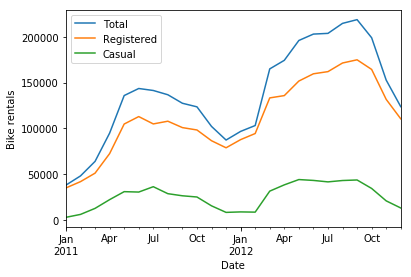

In [17]:
bike_monthly.cnt.plot(label="Total")
bike_monthly.registered.plot(label="Registered")
bike_monthly.casual.plot(label="Casual")
plt.ylabel("Bike rentals")
plt.xlabel("Date")
plt.legend();

Clearly there is a cycle. Low rentals in the end/beginnen of the year (winter is coming?) and high in the middle (summer time sadness?) It is also noticeable the increase in the number of rentals from year 1 to year 2.

# Exercise 4

What is the effect of the day being a working day on the number of registered and causal riders?

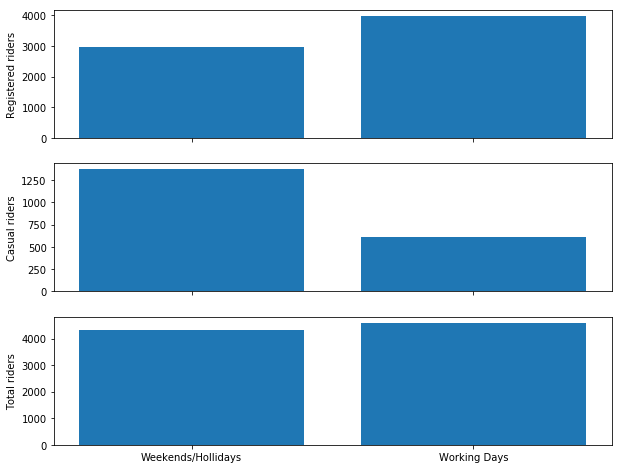

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(10,8))
#Plot 1
ax1.bar(bike.workingday.unique(), bike.groupby(by='workingday').mean().registered)
ax1.set_ylabel('Registered riders')

#Plot 2
ax2.bar(bike.workingday.unique(), bike.groupby(by='workingday').mean().casual)
ax2.set_ylabel('Casual riders')

#Plot 3
ax3.bar(bike.workingday.unique(), bike.groupby(by='workingday').mean().cnt)
ax3.set_ylabel('Total riders')

ax3.locator_params(integer=True) #For x-axis with integers

labels = ["", "Weekends/Hollidays", "Working Days"] #It starts from the item 1, don't know why

ax3.set_xticklabels(labels);

Casual riders are a lot more likely to use the service out of working days, while the registered riders tend to use more during working days. Summing up, there is not much difference between the days.

# Exercise 5

Create a new variable in the data framecalled nice_day and initialize the value to 0. 
Write a for loop that replaces the values of the empty variable with a 1 if the day is a nice day. 
A nice day is defined is fulfilling one or more of the following criteria:
* weathersit = 1
* temp > 10 and temp< 30 and windspeed < 10
* windspeed < 20 and atemp > 15 and hum < 0.75
* weathersit =2 and hum < 0.7 
* workingday = 0

In [19]:
bike["nice_day"] = 0

In [20]:
for i, row in bike.iterrows():
    if (
        (bike.loc[i, "weathersit"] == 1) or 
        (bike.loc[i, "temp"] > 10 and bike.loc[i, "temp"] < 30 and bike.loc[i, "windspeed"] <10) or
        (bike.loc[i, "windspeed"] < 20 and bike.loc[i, "atemp"] > 15 and bike.loc[i, "hum"] < 0.75) or
        (bike.loc[i, "weathersit"] == 2 and bike.loc[i, "hum"] < 0.7) or
        (bike.loc[i , "workingday"] == 0)):
        bike.at[i, 'nice_day'] = 1

#### 5.1. How many days are nice days?

In [21]:
print("Number of nice days: {:4d}".format(bike.nice_day[bike.nice_day == 1].sum()))

Number of nice days:  611


#### 5.2. What is the proportion of working days that are nice?

In [22]:
prop = bike.nice_day[(bike.nice_day == 1) & (bike.workingday == 1)].sum() / bike.nice_day[bike.workingday == 1].count()
print("Proportion of nice days: {:4.1%}".format(prop))

Proportion of nice days: 76.0%


#### 5.3. Test whether this variable can predict the number of casual riders in a regression model.

In [23]:
model = ols("casual ~ nice_day", bike)
estimates = model.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     59.72
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           3.63e-14
Time:                        18:40:00   Log-Likelihood:                -5782.7
No. Observations:                 731   AIC:                         1.157e+04
Df Residuals:                     729   BIC:                         1.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    422.1417     60.301      7.001      0.0

Well, the nice_day coef is quite high. So it seems to be a good predictor.

# Exercise 6

Generate a statistical model (linear regression) with variables of your own choice to predict ridership for the variable cnt. What variables appear to be good predictors? Explain how you arrived at the model of your choice and why you chose your variables as you did.

In [24]:
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,nice_day
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1


Some things that we can get rid off:
1. Instant is just the index, and we already have the date
2. Month and season are somewhat correlated with temperature
3. We are only going to look at cnt here

Also, I suspect that temp and atemp are very correlated:

In [25]:
bike[["temp", "atemp"]].corr()

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


Indeed! Then let's go for the real feel and drop temp from the regression.

Although nice day seems like a good predictor, it's a complex variable. So let's pass it.

Now, we have not seen the relations of the weekday and holidays yet. Let's look at them:

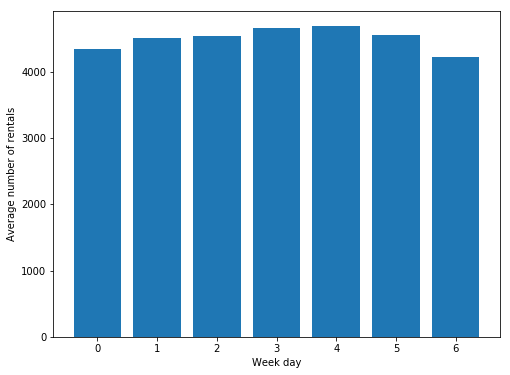

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(bike.weekday.unique(), bike.groupby(by='weekday').mean().cnt)
ax.set_ylabel('Average number of rentals')
ax.set_xlabel('Week day')
ax.locator_params(integer=True)

It seems pretty constant, besides some drop in day 6

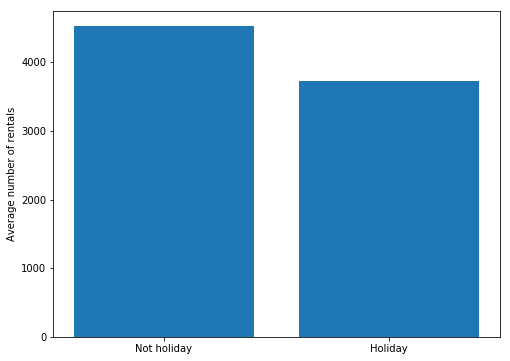

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(bike.holiday.unique(), bike.groupby(by='holiday').mean().cnt)
ax.set_ylabel('Average number of rentals')

labels = ["", "Not holiday", "Holiday"] #It starts from the item 1, don't know why

ax.locator_params(integer=True)
ax.set_xticklabels(labels);

Well, seems that people use them to work a lot more than for fun.

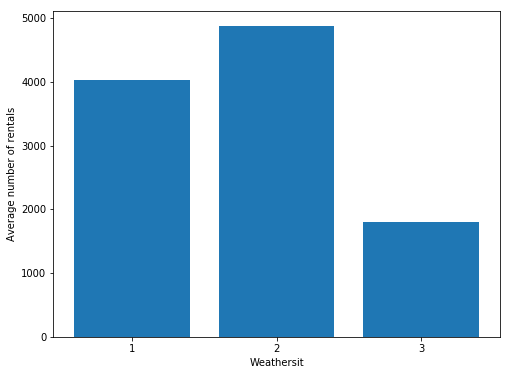

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(bike.weathersit.unique(), bike.groupby(by='weathersit').mean().cnt)
ax.set_xlabel('Weathersit')
ax.set_ylabel('Average number of rentals')
ax.locator_params(integer=True)

People don't like riding when: 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
Makes sense!

This leaves us with year (because of the increase), holiday, weathersit, atemp, hum, windspeed

In [30]:
model = ols("cnt ~ yr + holiday + C(weathersit) + atemp + hum + windspeed", bike)
estimates = model.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     309.8
Date:                Fri, 13 Sep 2019   Prob (F-statistic):          8.78e-213
Time:                        18:42:47   Log-Likelihood:                -6063.0
No. Observations:                 731   AIC:                         1.214e+04
Df Residuals:                     723   BIC:                         1.218e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1608.2757    261

Bonus: One of the assumptions of the multiple linear regression model is that the residuals are normally distributed.

In [31]:
# For other tests
import scipy
import scipy.stats

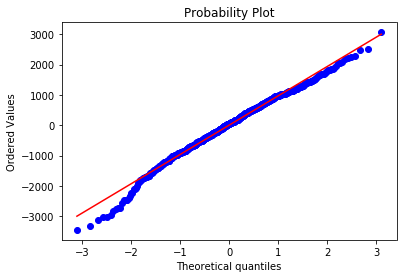

In [32]:
scipy.stats.probplot(estimates.resid, plot=plt)
plt.show()

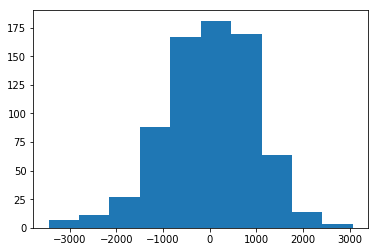

In [33]:
plt.hist(estimates.resid)
plt.show()

It seems a bit left-skewed, but it seems to do well.